In [1]:
#this code will import libraries
import pandas as pd
import matplotlib.pyplot as plt




#This code will load the data
data = pd.read_csv('/kaggle/input/student-performance-predictions/student_performance.csv')



In [2]:
data

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [4]:
#this code will show all the columns in the dataset
data.columns

Index(['StudentID', 'Name', 'Gender', 'AttendanceRate', 'StudyHoursPerWeek',
       'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport',
       'FinalGrade'],
      dtype='object')

In [5]:
#This code will check the null value in the dataset
data.isna().sum()

StudentID                    0
Name                         0
Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
dtype: int64

**So there isn't any missing values **

**How does parental support affect and studying hours per day ? **


In [6]:
#This code will show the mean value for the column StudyHoursPerWeek
data['StudyHoursPerWeek'].mean()

17.7

In [9]:
#this code will give the boolean value the value which is less than mean
data['StudyHoursPerWeek'] < 17.7

0     True
1    False
2     True
3    False
4    False
5    False
6     True
7     True
8     True
9    False
Name: StudyHoursPerWeek, dtype: bool

In [11]:
#This code will give the colum in which person has less than mean study weekly hours
data[data['StudyHoursPerWeek'] < 17.7]

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
2,3,Alex,Male,78,10,65,0,Low,68
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72


In [12]:
#This code will save that value in a variable
data_lower_than_mean = data[data['StudyHoursPerWeek'] < 17.7]
#This code will show the two column of the dataframe data_lower_than_mean
data_lower_than_mean[["ParentalSupport", "StudyHoursPerWeek"]]

,ParentalSupport,StudyHoursPerWeek
0,High,15
2,Low,10
6,Low,8
7,Medium,17
8,Low,12


**We can observe that most students who study fewer hours per week than the average have parental support ranging from low to medium.**

In [13]:
#This code save the dataframe which have higher mean study hours in the variable
data_higher_than_mean = data[data['StudyHoursPerWeek'] > 17.7]
#This code will show the ParentalSupport for that students
data_higher_than_mean[["ParentalSupport", "StudyHoursPerWeek"]]

,ParentalSupport,StudyHoursPerWeek
1,Medium,20
3,High,25
4,Medium,18
5,High,30
9,High,22


In [19]:
#study score of student with high parental support
data['StudyHoursPerWeek'][data['ParentalSupport'] == 'High'].mean()

23.0

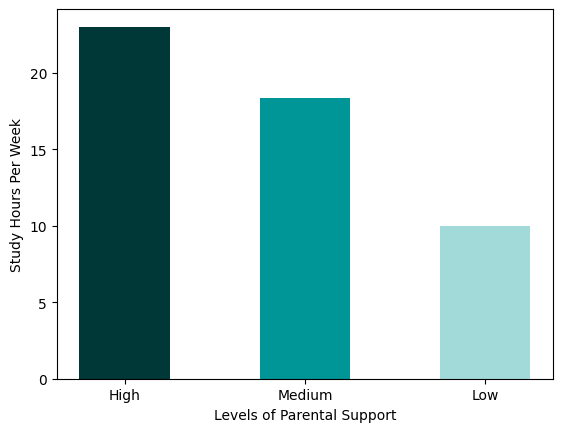

In [20]:
#storing the mean of high support students study hours in a varaable
studying_hour_high_support = data['StudyHoursPerWeek'][data['ParentalSupport'] == 'High'].mean()
studying_hour_medium_support = data['StudyHoursPerWeek'][data['ParentalSupport'] == 'Medium'].mean()
studying_hour_low_support = data['StudyHoursPerWeek'][data['ParentalSupport'] == 'Low'].mean()

x = ['High', 'Medium', 'Low']
y = [studying_hour_high_support, studying_hour_medium_support, studying_hour_low_support]

plt.bar(x, y, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Study Hours Per Week')
plt.show()

**We can observe that most students who study more hours per week than the average have parental support ranging from medium to high.**

**How does parental support affect the activiy ?**

In [23]:
#This code will get column partental support and extracuricularactivities
data[["ParentalSupport", "ExtracurricularActivities"]]

,ParentalSupport,ExtracurricularActivities
0,High,1
1,Medium,2
2,Low,0
3,High,3
4,Medium,2
5,High,1
6,Low,0
7,Medium,1
8,Low,2
9,High,3


In [25]:
data['ParentalSupport'] == 'High'

0     True
1    False
2    False
3     True
4    False
5     True
6    False
7    False
8    False
9     True
Name: ParentalSupport, dtype: bool

In [22]:

data['ExtracurricularActivities'][data['ParentalSupport'] == 'High']

0    1
3    3
5    1
9    3
Name: ExtracurricularActivities, dtype: int64

**We can observe that the students who parental support is high, participate in at least one extra activity .**

In [27]:
data['ExtracurricularActivities'][data['ParentalSupport'] == 'Medium']

1    2
4    2
7    1
Name: ExtracurricularActivities, dtype: int64

**We can observe that the students who parental support is medium, participate in at least one extra activity, too.**

In [28]:
data['ExtracurricularActivities'][data['ParentalSupport'] == 'Low']

2    0
6    0
8    2
Name: ExtracurricularActivities, dtype: int64

**We can observe that the most students with low parental support, doesn't participate in any extra activity .**

In [ ]:
data['ParentalSupport'][data.ExtracurricularActivities == 0]

**We can observe that all students who don't participate in any activity have the low parental support .**

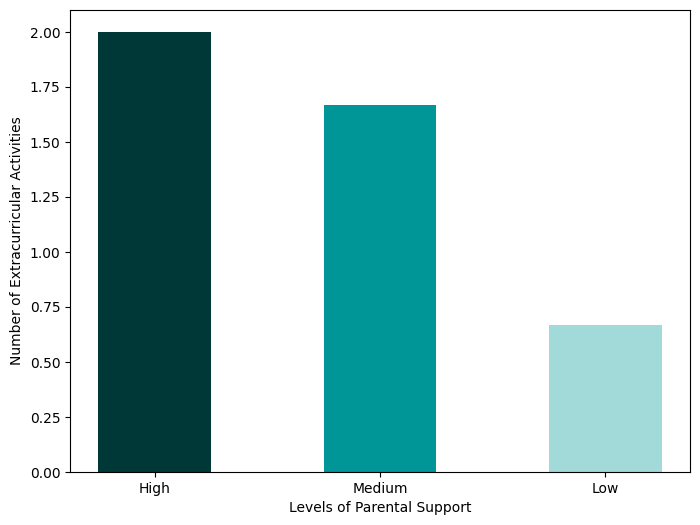

In [29]:
activities_high_support = data['ExtracurricularActivities'][data['ParentalSupport'] == 'High'].mean()
activities_medium_support = data['ExtracurricularActivities'][data['ParentalSupport'] == 'Medium'].mean()
activities_low_support = data['ExtracurricularActivities'][data['ParentalSupport'] == 'Low'].mean()
x = ['High', 'Medium', 'Low']
y = [activities_high_support, activities_medium_support, activities_low_support]
plt.bar(x, y, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Extracurricular Activities')
plt.show()

**How does parental support affect final grades?**

In [31]:
data["FinalGrade"].mean()

80.2

In [32]:
data['ParentalSupport'][data['FinalGrade']<80.2]

0      High
2       Low
6       Low
7    Medium
8       Low
Name: ParentalSupport, dtype: object

Here is the number of students who have a lower final grade than the average and a high parental support :

In [33]:
high_support_low_grade = len(data[(data['ParentalSupport']=='High') & (data['FinalGrade']<80.2)])


In [34]:
high_support_low_grade

1

Here is the number of students who have a lower final grade than the average and a medium parental support :

In [35]:
medium_support_low_grade = len(data[(data['ParentalSupport']=='Medium') & (data['FinalGrade']<80.2)])

In [36]:
medium_support_low_grade

1

Here is the number of students who have a lower final grade than the averge and a low parental support :

In [37]:
low_support_low_grade = len(data[(data['ParentalSupport']=='Low') & (data['FinalGrade']<80.2)])

In [38]:
low_support_low_grade

3

**We can notice that a higher percentage of students with final grades below average have lower parental support.**

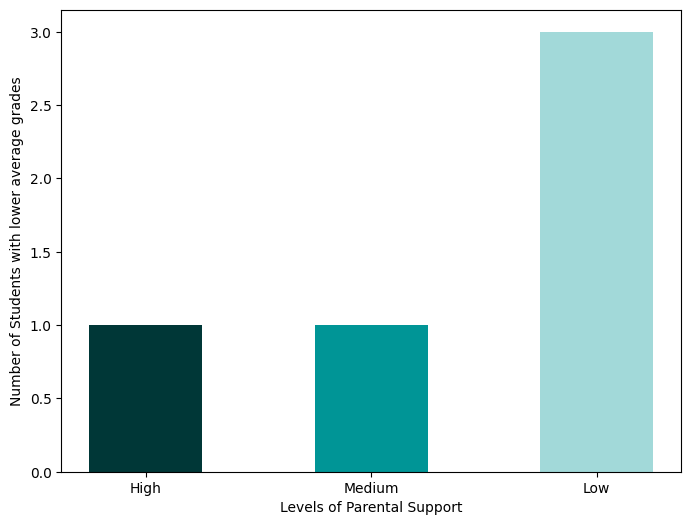

In [39]:
high_support_low_grade = len(data[(data['ParentalSupport']=='High') & (data['FinalGrade']<80.2)])
medium_support_low_grade = len(data[(data['ParentalSupport']=='Medium') & (data['FinalGrade']<80.2)])
low_support_low_grade = len(data[(data['ParentalSupport']=='Low') & (data['FinalGrade']<80.2)])

x = ['High', 'Medium', 'Low']
y = [high_support_low_grade, medium_support_low_grade, low_support_low_grade]
plt.bar(x, y, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Students with lower average grades')
plt.show()

In [40]:
data['ParentalSupport'][data['FinalGrade']>80.2]

1    Medium
3      High
4    Medium
5      High
9      High
Name: ParentalSupport, dtype: object

Here is the number of the students who have a higher final grade than the average and a high parental support :

In [41]:
len(data[(data['ParentalSupport']=='High') & (data['FinalGrade']>80.2)])

3

Here is the number of the students who have a higher final grade than the average and a medium parental support :

In [42]:
len(data[(data['ParentalSupport']=='Medium') & (data['FinalGrade']>80.2)])

2

Here is the number of students who have a higher final grade than the average and a low parental support :

In [43]:
len(data[(data['ParentalSupport']=='Low') & (data['FinalGrade']>80.2)])

0

**As we can see, parental support is positively correlated with students' final grades .**

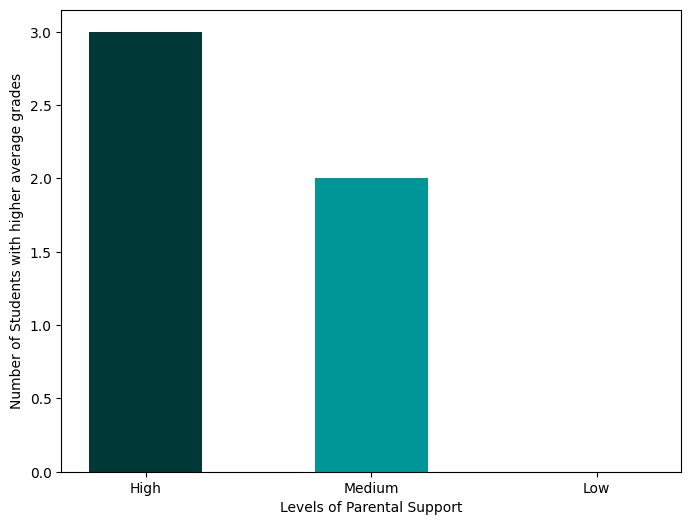

In [44]:
high_support_high_grade = len(data[(data['ParentalSupport']=='High') & (data['FinalGrade']>80.2)])
medium_support_high_grade = len(data[(data['ParentalSupport']=='Medium') & (data['FinalGrade']>80.2)])
low_support_high_grade = len(data[(data['ParentalSupport']=='Low') & (data['FinalGrade']>80.2)])

x = ['High', 'Medium', 'Low']
y = [high_support_high_grade, medium_support_high_grade, low_support_high_grade]
plt.bar(x, y, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Students with higher average grades')
plt.show()

**How does parental suppert affect the attendance rate ?**

In [45]:
data['AttendanceRate'].mean()

85.6

In [47]:
data['ParentalSupport'][data['AttendanceRate']<85.6]

0      High
2       Low
6       Low
7    Medium
8       Low
Name: ParentalSupport, dtype: object

Here is the number of students whose attendence rate is lower than the average and have a high parental support :

In [48]:
len(data[(data['AttendanceRate']<85.6) & (data['ParentalSupport']=='High')])

1

Here is the number of students whose attendence rate is lower than the average and have a medium  parental support :

In [49]:
len(data[(data['AttendanceRate']<85.6) & (data['ParentalSupport']=='Medium')])

1

Here is the number of students whose attendence rate is lower than the average and have a low parental support :

In [52]:
len(data[(data['AttendanceRate']<85.7) & (data['ParentalSupport']=='Low')])

3

**We can notice that most students with an attendance rate lower than the average have lower parental support.**

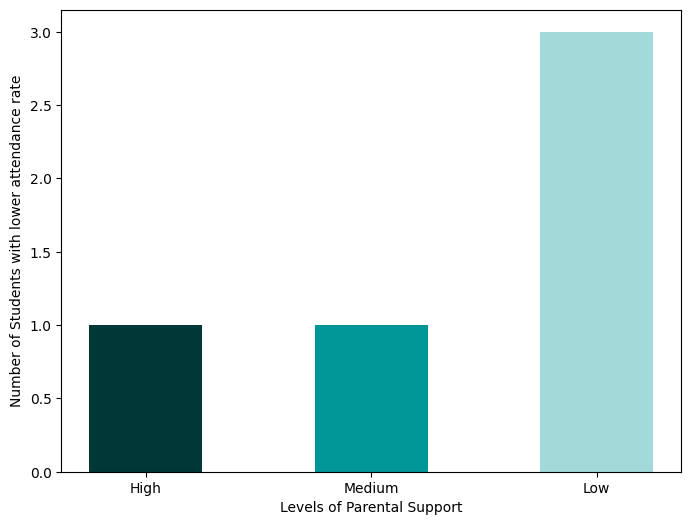

In [56]:
low_attendance_high_support = len(data[(data['AttendanceRate']<85.6) & (data['ParentalSupport']=='High')])
low_attendance_medium_support = len(data[(data['AttendanceRate']<85.6) & (data['ParentalSupport']=='Medium')])
low_attendance_low_support = len(data[(data['AttendanceRate']<85.6) & (data['ParentalSupport']=='Low')])

x=['High', 'Medium', 'Low']
y=[low_attendance_high_support, low_attendance_medium_support, low_attendance_low_support]
plt.bar(x, y, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Students with lower attendance rate')
plt.show()

In [57]:
data['ParentalSupport'][data['AttendanceRate']>85.6]

1    Medium
3      High
4    Medium
5      High
9      High
Name: ParentalSupport, dtype: object

Here is the number of students with an attendance rate higher than the average and have the higher parental support :

In [58]:
len(data[(data['AttendanceRate']>85.6) & (data['ParentalSupport']=='High')])

3

Here is the number of students with an attendance rate higher than the average and have the medium parental support :

In [59]:
len(data[(data['AttendanceRate']>85.6) & (data['ParentalSupport']=='Medium')])

2

Here is the number of students with an attendance rate higher than the average and have the low parental support :

In [60]:
len(data[(data['AttendanceRate']>85.6) & (data['ParentalSupport'] == 'Low')])

0

**We can observe that all students with an attendance rate higher than the average have medium or high parental support**

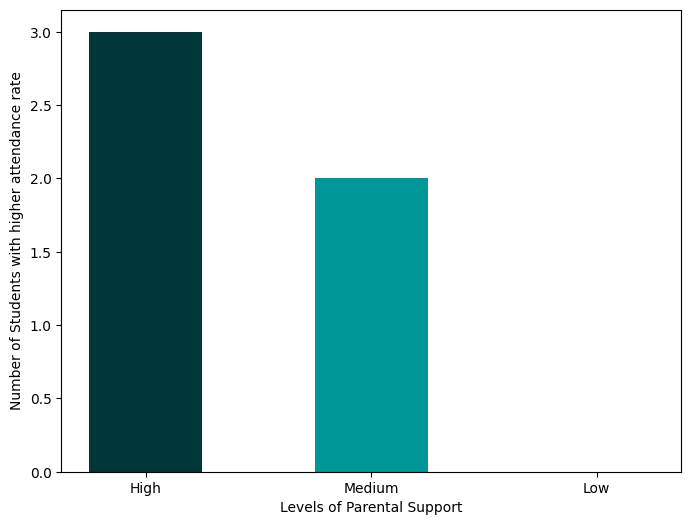

In [61]:
high_attendance_high_support = len(data[(data['AttendanceRate']>85.6) & (data['ParentalSupport']=='High')])
high_attendance_medium_support = len(data[(data['AttendanceRate']>85.6) & (data['ParentalSupport']=='Medium')])
high_attendance_low_support = len(data[(data['AttendanceRate']>85.6) & (data['ParentalSupport']=='Low')])

x = ['High', 'Medium', 'Low']
y = [high_attendance_high_support, high_attendance_medium_support, high_attendance_low_support]

plt.bar(x, y, color=["#003737", "#009596", "#A2D9D9"], width=0.5)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Levels of Parental Support')
plt.ylabel('Number of Students with higher attendance rate')
plt.show()

How does extra activities affected by the gender ?

In [62]:
data[["ExtracurricularActivities", "Gender"]]

,ExtracurricularActivities,Gender
0,1,Male
1,2,Female
2,0,Male
3,3,Male
4,2,Female
5,1,Female
6,0,Male
7,1,Female
8,2,Male
9,3,Female


The number of males that participate into the extra activities :

In [63]:
data['ExtracurricularActivities'][data['Gender'] == "Male"].sum()

6

The number of females that participate into the extra activities :

In [66]:
data['ExtracurricularActivities'][data['Gender'] == "Female"].sum()

9

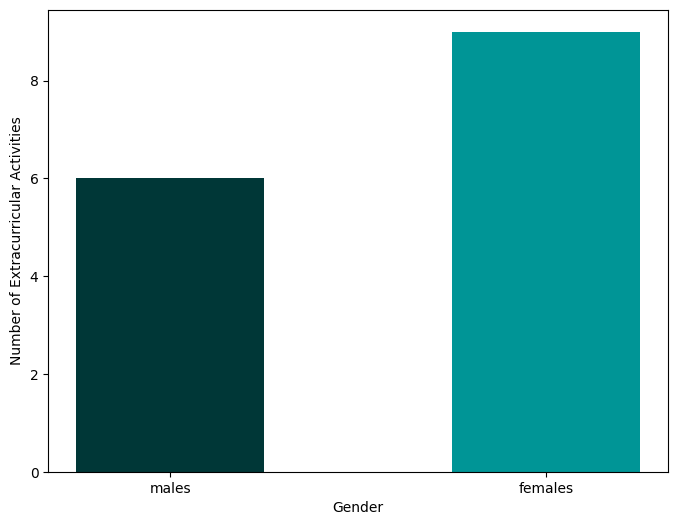

In [67]:
number_of_males = data['ExtracurricularActivities'][data['Gender'] == "Male"].sum()
number_of_females = data['ExtracurricularActivities'][data['Gender'] == "Female"].sum()

x = ['males', 'females']
y = [number_of_males, number_of_females]

plt.bar(x, y, color=["#003737", "#009596"], width=0.5)
plt.rcParams["figure.figsize"] = (4, 6)
plt.xlabel('Gender')
plt.ylabel('Number of Extracurricular Activities')
plt.show()

**We can notice that the females participate is more than males . **

**How do extra activities affect on the attendance rate ? **

In [68]:
data[["ExtracurricularActivities", "AttendanceRate"]]

,ExtracurricularActivities,AttendanceRate
0,1,85
1,2,90
2,0,78
3,3,92
4,2,88
5,1,95
6,0,70
7,1,85
8,2,82
9,3,91


In [69]:
data["AttendanceRate"].mean()

85.6

**The number of activities in which students with attendance rates below average are participating:**

In [71]:
data["ExtracurricularActivities"][data["AttendanceRate"]<85.6]

0    1
2    0
6    0
7    1
8    2
Name: ExtracurricularActivities, dtype: int64

The average number of extracurricular activities for students with attendance rates lower than the average:

In [72]:
data[data['AttendanceRate']<85.6]['ExtracurricularActivities'].mean()

0.8

The average number of extracurricular activities for students with attendance rates higher than the average :

In [73]:
data[data['AttendanceRate']>85.6]['ExtracurricularActivities'].mean()

2.2

**We can observe, on the whole that the attendance rate of students with extra activities is higher than the other students . **

What is the attendence rate about the students who participate in one extra activities ?

In [74]:
data[data['ExtracurricularActivities'] == 1]['AttendanceRate'].mean()


88.33333333333333

What is the attendence rate about the students who participate in two extra activities ?


In [75]:
data[data['ExtracurricularActivities'] == 2]['AttendanceRate'].mean()


86.66666666666667

What is the average of the attendence rate about the students who participate in more than two extra activities :


In [76]:
data[data['ExtracurricularActivities'] > 2]['AttendanceRate'].mean()


91.5

What is the average of the attendence rate about the students who doesn't participate in any extra activities ?

In [77]:
data[data['ExtracurricularActivities'] == 0]['AttendanceRate'].mean()


74.0

**From this, we can conclude that the attendance rate is positively correlated with the number of activities the student is involved in . **

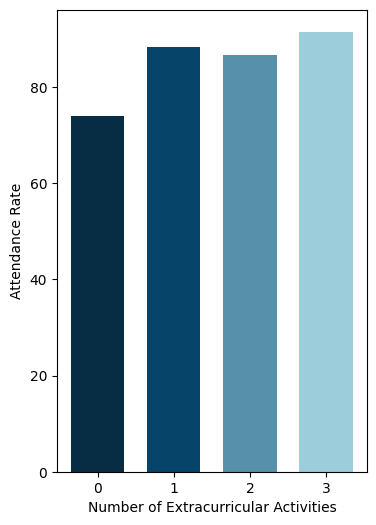

In [78]:
zero_activity = data[data['ExtracurricularActivities'] == 0]['AttendanceRate'].mean()
one_activity = data[data['ExtracurricularActivities'] == 1]['AttendanceRate'].mean()
two_activities = data[data['ExtracurricularActivities'] == 2]['AttendanceRate'].mean()
more_than_two_activities = data[data['ExtracurricularActivities'] > 2]['AttendanceRate'].mean()

x = [0, 1, 2, 3]
y=[zero_activity, one_activity, two_activities, more_than_two_activities]

plt.bar(x, y, color=["#072D44", "#064469", "#5790AB", "#9CCDDB"], width=0.7)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Number of Extracurricular Activities')
plt.ylabel('Attendance Rate')
plt.show()

What does extra activities affect the final grade ?

In [80]:
data[['ExtracurricularActivities', 'FinalGrade']]

,ExtracurricularActivities,FinalGrade
0,1,80
1,2,87
2,0,68
3,3,92
4,2,85
5,1,90
6,0,62
7,1,78
8,2,72
9,3,88


What is the average of the final grades of the students that participate into one extra activity ?

In [81]:
data['FinalGrade'][data['ExtracurricularActivities'] == 1].mean()

82.66666666666667

What is the average of the final grades of the students that participate into two extra activities ?

In [82]:
data['FinalGrade'][data['ExtracurricularActivities'] == 2].mean()

81.33333333333333

What is the average of the final grades of the students that participate into more than two activities ?

In [83]:
data['FinalGrade'][data['ExtracurricularActivities'] > 2].mean()

90.0

What is the average of the final grades of the students that aren't participate into any activities :

In [84]:
data['FinalGrade'][data['ExtracurricularActivities'] == 0].mean()

65.0

We can notice that the highest final grades are for  students who participate in more than 2 activities .

and the lowest final grades are for students who don't participate in any activity  .

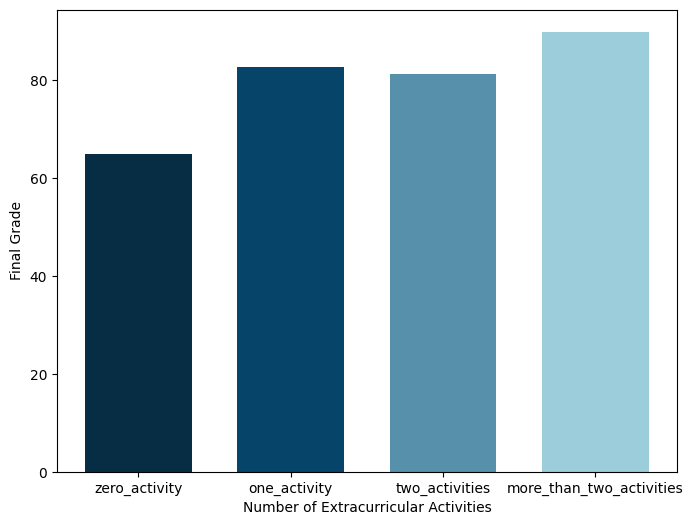

In [85]:
zero_activity_final_grade = data['FinalGrade'][data['ExtracurricularActivities'] == 0].mean()
one_activity_final_grade = data['FinalGrade'][data['ExtracurricularActivities'] == 1].mean()
two_activity_final_grade = data['FinalGrade'][data['ExtracurricularActivities'] == 2].mean()
more_than_two_activity_final_grade = data['FinalGrade'][data['ExtracurricularActivities'] > 2].mean()

x = ['zero_activity', 'one_activity', 'two_activities', 'more_than_two_activities']
y = [zero_activity_final_grade, one_activity_final_grade, two_activity_final_grade, more_than_two_activity_final_grade]

plt.bar(x, y, color=["#072D44", "#064469", "#5790AB", "#9CCDDB"], width=0.7)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Number of Extracurricular Activities')
plt.ylabel('Final Grade')
plt.show()

How do the extra activities affect the study hours per week ?

In [88]:
data[['StudyHoursPerWeek', 'ExtracurricularActivities']]


,StudyHoursPerWeek,ExtracurricularActivities
0,15,1
1,20,2
2,10,0
3,25,3
4,18,2
5,30,1
6,8,0
7,17,1
8,12,2
9,22,3


What is the average of study hours per week ?

In [89]:
data['StudyHoursPerWeek'].mean()

17.7

What is the average of activities which the students study hours above the average participate in ?

In [90]:
data['ExtracurricularActivities'][data['StudyHoursPerWeek']>17.7].mean()

2.2

What is the average of activities which the students study hours below the average participate in ?

In [91]:
data['ExtracurricularActivities'][data['StudyHoursPerWeek']<17.7].mean()

0.8

From this, we can conclude that the study hours per week are positively correlated with the number of activities the student is involved in .

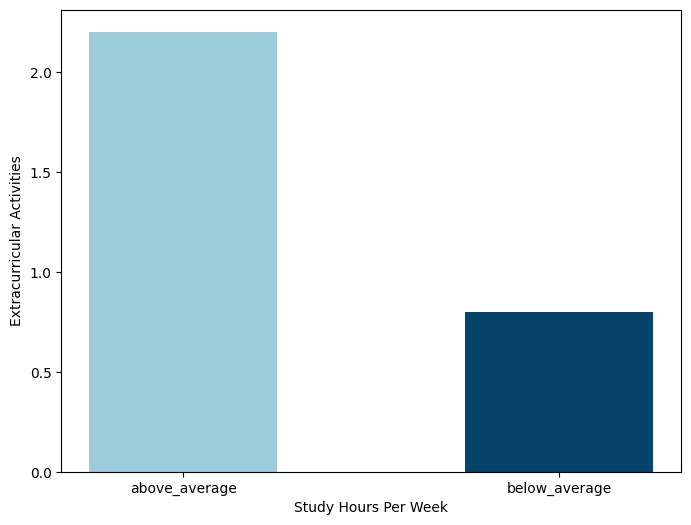

In [92]:
high_hours_with_activity = data['ExtracurricularActivities'][data['StudyHoursPerWeek']>17.7].mean()
low_hours_with_activity = data['ExtracurricularActivities'][data['StudyHoursPerWeek']<17.7].mean()

x = ['above_average', 'below_average']
y = [high_hours_with_activity, low_hours_with_activity]

plt.bar(x, y, color=["#9CCDDB", "#064469"], width=0.5)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Study Hours Per Week')
plt.ylabel('Extracurricular Activities')
plt.show()

How does the final grade affect the study hours ?

In [93]:
data[['FinalGrade', 'StudyHoursPerWeek']]

,FinalGrade,StudyHoursPerWeek
0,80,15
1,87,20
2,68,10
3,92,25
4,85,18
5,90,30
6,62,8
7,78,17
8,72,12
9,88,22


What is the average of the final grades ?

In [94]:
data['FinalGrade'].mean()

80.2

What is the average of the studying hours ?

In [95]:
data['StudyHoursPerWeek'].mean()

17.7

What is the average of the final grades when the studying hours is below the average ?

In [96]:
data[data['StudyHoursPerWeek'] < 17.7]['FinalGrade'].mean()


72.0

What is the average of the final grades when the studying hours is above the average ?

In [ ]:
data[data['StudyHoursPerWeek']>17.7]['FinalGrade'].mean()

How does the final grade affected by the studying hours per week ?

What is the average number of the studying hours for the students who have final grades  < 70 ?

In [ ]:
data[data['FinalGrade'] < 70]['StudyHoursPerWeek'].mean()


What is the average number of the studying hours for the students who have final grades between 70 and 80 ?

In [ ]:
data[(data['FinalGrade']>=70) & (data['FinalGrade']<=80)]['StudyHoursPerWeek'].mean()


What is the average number of the studying hours for the students who have final grades between 80 and 90 ?

In [ ]:
data[data['FinalGrade']>80 & (data['FinalGrade']<=90)]['StudyHoursPerWeek'].mean()

What is the average number of the studying hours for the students who have final grades between 90 and 100 ?

In [ ]:
data[data['FinalGrade']>90]['StudyHoursPerWeek'].mean()

**Here, it is evident that the number of study hours per week affects the final grades; as the number of study hours increases, the grades tend to improve.**

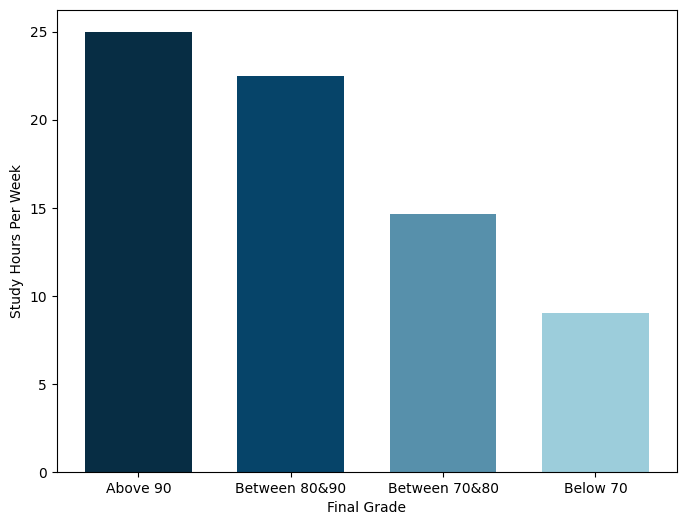

In [98]:
import numpy as np
more_than_90_final_grade = data[data['FinalGrade']>90]['StudyHoursPerWeek'].mean()
from_80_to_90_final_grade = data[(data['FinalGrade']>80) & (data['FinalGrade']<=90)]['StudyHoursPerWeek'].mean()
from_70_to_80_final_grade = data[(data['FinalGrade']>=70) & (data['FinalGrade']<=80)]['StudyHoursPerWeek'].mean()
less_than_70_final_grade = data[data['FinalGrade']<70]['StudyHoursPerWeek'].mean()

x = ['Above 90', 'Between 80&90', 'Between 70&80', 'Below 70']
y= [more_than_90_final_grade, from_80_to_90_final_grade, from_70_to_80_final_grade, less_than_70_final_grade]

plt.bar(x, y, color=["#072D44", "#064469", "#5790AB", "#9CCDDB"], width=0.7)
plt.rcParams["figure.figsize"] = (8, 6)
plt.xlabel('Final Grade')
plt.ylabel('Study Hours Per Week')
plt.show()


How do the previous grades affect the final grades ?

In [ ]:
data[['FinalGrade', 'PreviousGrade']]

In [ ]:
data[data['PreviousGrade']<78.1]['FinalGrade'].mean()

In [ ]:
data[data['PreviousGrade']>78.1]['FinalGrade'].mean()

**We can notice that the previous grades affect on the final grades . **

In [ ]:
low_previous_grades = data[data['PreviousGrade']<78.1]['FinalGrade'].mean()
high_previous_grades = data[data['PreviousGrade']>78.1]['FinalGrade'].mean()

x = ['Low', 'High']
y = [low_previous_grades, high_previous_grades]

plt.bar(x, y, color=["#5790AB", "#064469"], width=0.4)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Previous Grades')
plt.ylabel('Final Grades')
plt.show()

How does the attendence rate affect the final grades ?

In [ ]:
data[['FinalGrade', 'AttendanceRate']]

The attendance rate for the students with high final grades than the average :

In [ ]:
data['AttendanceRate'][data['FinalGrade']>80.2]

What is the average number of the attendence rates of the students which gets final grade above the average ?

In [ ]:
data[data['FinalGrade']>80.2]['AttendanceRate'].mean()

The attendance rate for the students with low final grades than the average :

In [ ]:
data['AttendanceRate'][data['FinalGrade']<80.2]

The average number of the attendance rate for the students with low final grades than the average :

In [ ]:
data[data['FinalGrade']<80.2]['AttendanceRate'].mean()

In [ ]:
low_final_grades = data[data['FinalGrade']<80.2]['AttendanceRate'].mean()
high_final_grades = data[data['FinalGrade']>80.2]['AttendanceRate'].mean()

x = ['Low', 'High']
y = [low_final_grades, high_final_grades]

plt.bar(x, y, color=["#5790AB", "#064469"], width=0.4)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Final Grades')
plt.ylabel('Attendance Rate')
plt.show()

**Here we can notice that the attendance rate affect on the final grades . **

Is the gender affect on the attendence rate ?

The average of the attendence rate of males :

In [ ]:
data[data['Gender']=='Male']['AttendanceRate'].mean()

The average of the attendence rate of females :

In [ ]:
data[data['Gender']=='Female']['AttendanceRate'].mean()

**We can notice that the attendance rate for females is higher than males . **

In [ ]:
males_attendance = data[data['Gender']=='Male']['AttendanceRate'].mean()
females_attendance = data[data['Gender']=='Female']['AttendanceRate'].mean()

x = ['Males', 'Females']
y = [males_attendance, females_attendance]

plt.bar(x, y, color=["#072D44", "#5790AB"], width=0.4)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Gender')
plt.ylabel('Attendance Rate')
plt.show()

How does the gender affect on the study hours ?

The average of the study hours per week of males :

In [ ]:
data[data['Gender']=='Male']['StudyHoursPerWeek'].mean()

The average of the study hours per week of females :

In [ ]:
data[data['Gender']=='Female']['StudyHoursPerWeek'].mean()

**Here we can notice that the studying hours per week for females is higher than males . **

In [ ]:
males_studgying_hours = data[data['Gender']=='Male']['StudyHoursPerWeek'].mean()
females_studying_hours = data[data['Gender']=='Female']['StudyHoursPerWeek'].mean()

x = ['Males', 'Females']
y = [males_studgying_hours, females_studying_hours]

plt.bar(x, y, color=["#072D44", "#5790AB"], width=0.4)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Gender')
plt.ylabel('Study Hours Per Week')
plt.show()